In [1]:
import pandas as pd
import matplotlib.pyplot as plt

""""The data source is the file with the name UnicornRecorder_AntC1_Rostros_08_11_2024_10_32_290"""

eeg_data = pd.read_csv('EEGdata.csv', header=None)


Since the EEGdata.csv file used for this has 18,363 samples at a sampling rate of 250Hz, the total ammount of time for this data took 18,363×0.004seconds=73.452seconds

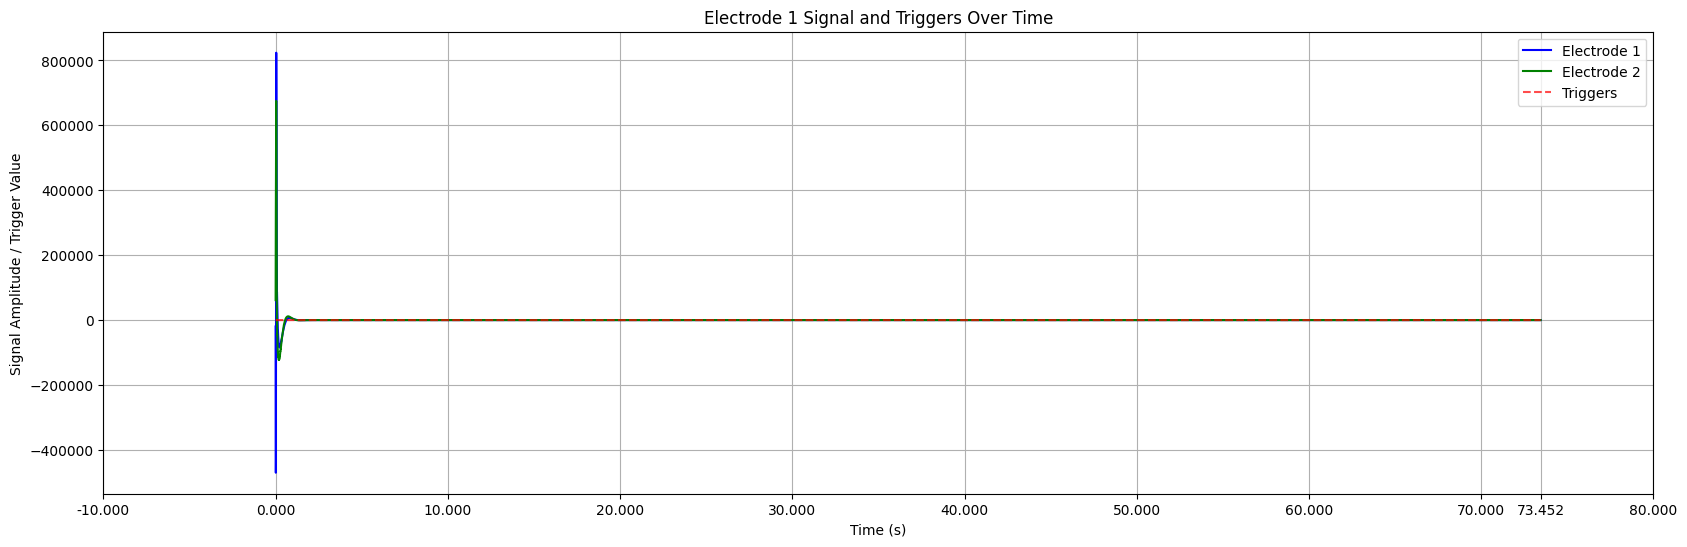

In [2]:
# Load the dataset
eeg_data = pd.read_csv('EEGdata_cleaned.csv', header=None, skiprows=0)

# Define the sampling rate (250 Hz)
sampling_rate = 250  # Hz
time_increment = 1 / sampling_rate  # seconds per sample

# Add a "Time" column
eeg_data['Time'] = eeg_data.index * time_increment

# Create a single figure to plot both Electrode 1 and Triggers
plt.figure(figsize=(20, 6))

# Plot the first column (Electrode 1) using "Time" as the x-axis
plt.plot(eeg_data['Time'], eeg_data.iloc[:, 0], label='Electrode 1', color='blue')

# Plot the first column (Electrode 1) using "Time" as the x-axis
plt.plot(eeg_data['Time'], eeg_data.iloc[:, 1], label='Electrode 2', color='green')

# Plot the triggers (assume triggers are in column 8) using "Time" as the x-axis
plt.plot(eeg_data['Time'], eeg_data.iloc[:, 8], label='Triggers', color='red', linestyle='--', alpha=0.7)

# Set x-axis ticks, including the last time value
plt.xticks(
    ticks=list(plt.xticks()[0]) + [eeg_data['Time'].iloc[-1]],
    labels=[f'{tick:.3f}' if tick != eeg_data['Time'].iloc[-1] else f'{eeg_data["Time"].iloc[-1]:.3f}' for tick in list(plt.xticks()[0]) + [eeg_data['Time'].iloc[-1]]]
)

# Add labels, title, and legend
plt.xlabel('Time (s)')
plt.ylabel('Signal Amplitude / Trigger Value')
plt.title('Electrode 1 Signal and Triggers Over Time')
plt.legend()
plt.grid()

# Show the plot
plt.show()

Now, what needs to be identified is whenever a trigger occurs. From that, an observable window of 0.5segs needs to be stablished: 0.1s before the trigger ocurrence and 0.4s after such trigger. In terms of samples, this means to checkout about previous 25 samples


In [6]:
import os

# Create a directory to save the plots
output_dir = "trigger_plots"
os.makedirs(output_dir, exist_ok=True)

# Track previously processed ranges to avoid duplicate or overlapping plots
processed_ranges = []

# Assuming column 8 contains the trigger values
trigger_column_index = 8  # Adjust if the trigger column index is different

# Identify the indices where triggers occur (non-zero values in the trigger column)
trigger_occurrences = eeg_data[eeg_data.iloc[:, trigger_column_index] != 0].index

# Calculate 0.1 seconds (25 samples) before and 0.4 seconds (100 samples) after the first trigger
samples_before_trigger = int(0.1 * sampling_rate)
samples_after_trigger = int(0.4 * sampling_rate)

# Loop through all trigger occurrences
for i, trigger_idx in enumerate(trigger_occurrences):
    # Calculate the zoomed-in range for the current trigger
    start_idx = max(0, trigger_idx - samples_before_trigger)
    end_idx = min(len(eeg_data), trigger_idx + samples_after_trigger)

    # Skip if this range overlaps with a previously processed range
    if any(start_idx <= end <= end_idx or start_idx <= start <= end_idx for (start, end) in processed_ranges):
        continue

    # Extract the data for the zoomed-in region
    zoomed_data = eeg_data.iloc[start_idx:end_idx + 1]

    # Get the trigger value and time
    trigger_value = eeg_data.iloc[trigger_idx, trigger_column_index]
    trigger_time = eeg_data['Time'].iloc[trigger_idx]

    # Create the plot
    plt.figure(figsize=(20, 6))
    plt.plot(zoomed_data['Time'], zoomed_data.iloc[:, 0], label='Electrode 1', color='blue')
    plt.plot(zoomed_data['Time'], zoomed_data.iloc[:, 1], label='Electrode 2', color='green')
    plt.plot(zoomed_data['Time'], zoomed_data.iloc[:, 2], label='Electrode 3', color='yellow')
    plt.plot(zoomed_data['Time'], zoomed_data.iloc[:, 3], label='Electrode 4', color='purple')
    plt.plot(zoomed_data['Time'], zoomed_data.iloc[:, 4], label='Electrode 5', color='orange')
    plt.plot(zoomed_data['Time'], zoomed_data.iloc[:, 5], label='Electrode 6', color='cyan')
    plt.plot(zoomed_data['Time'], zoomed_data.iloc[:, 6], label='Electrode 7', color='magenta')
    plt.plot(zoomed_data['Time'], zoomed_data.iloc[:, 7], label='Electrode 8', color='brown')
    plt.plot(zoomed_data['Time'], zoomed_data.iloc[:, 8], label='Triggers', color='red', linestyle='--', alpha=0.7)

    # Add a vertical line at the trigger occurrence
    plt.axvline(
        x=trigger_time,
        color='red',
        linestyle='-',
        linewidth=1.5,
        label=f'Trigger {int(trigger_value)}'
    )

    # Remove close ticks to avoid overlap
    current_ticks = plt.xticks()[0]
    new_ticks = [tick for tick in current_ticks if abs(tick - trigger_time) > 0.02]  # Remove ticks within 0.02s of trigger time
    new_ticks.append(trigger_time)
    plt.xticks(new_ticks, labels=[f'{tick:.3f}' for tick in new_ticks], rotation=45)

    # Add labels, title, and legend
    plt.xlabel('Time (s)')
    plt.ylabel('Signal Amplitude / Trigger Value')
    plt.title(f'Trigger {i + 1}: Value = {int(trigger_value)}')
    plt.legend()
    plt.grid()

    # Save the plot
    plt.savefig(os.path.join(output_dir, f'trigger_{i + 1}_value_{int(trigger_value)}.png'))
    plt.close()

    # Add this range to processed_ranges
    processed_ranges.append((start_idx, end_idx))

# Indicate completion
print(f"Plots for all unique triggers with optimized x-axis labels have been saved in the '{output_dir}' directory.")




Plots for all unique triggers with optimized x-axis labels have been saved in the 'trigger_plots' directory.


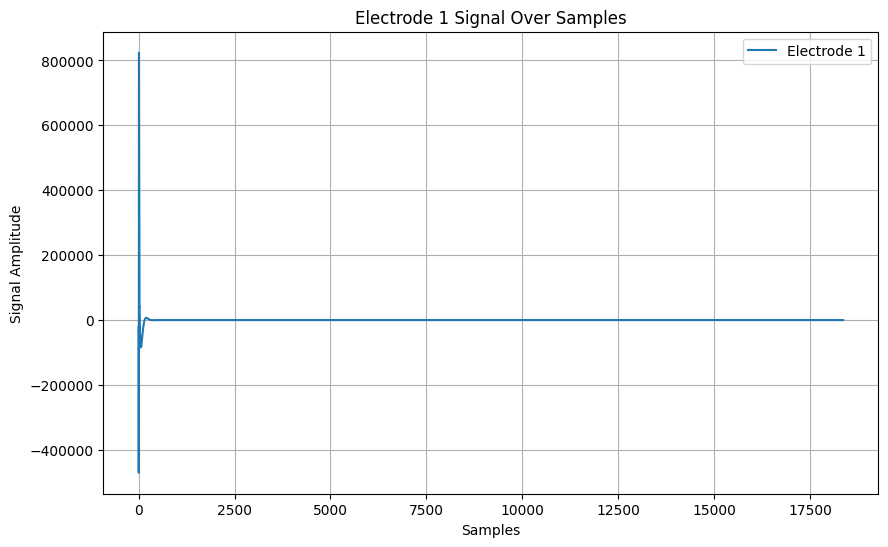

In [49]:
print(eeg_data.columns)


Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64')


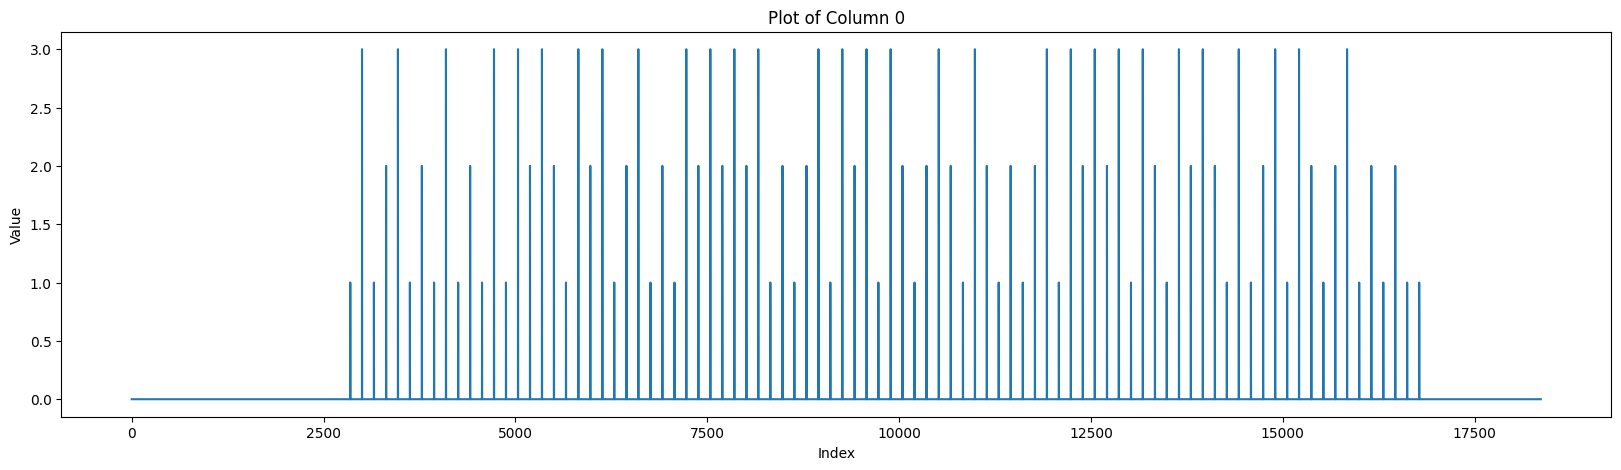

Size of Column 0: 300


In [86]:
# Select a single column by its index (e.g., the first column)
column_0 = eeg_data.iloc[0:300, 0]

# Select a single column by its index (e.g., the first column)
column_1 = eeg_data.iloc[0:300, 1]

# Select a single column by its index (e.g., the first column)
column_2 = eeg_data.iloc[0:300, 2]

# Select a single column by its index (e.g., the first column)
column_3 = eeg_data.iloc[0:300, 3]

# Select a single column by its index (e.g., the first column)
column_4 = eeg_data.iloc[0:300, 4]

# Select a single column by its index (e.g., the first column)
column_5 = eeg_data.iloc[0:300, 5]

# Select a single column by its index (e.g., the first column)
column_6 = eeg_data.iloc[0:300, 6]

# Select a single column by its index (e.g., the first column)
column_7 = eeg_data.iloc[0:300, 7]

# Select a single column by its index (e.g., the first column)
column_8 = eeg_data.iloc[:, 8]

# Plot the data from the first column
plt.figure(figsize=(20, 5))  # Adjust width and height as needed

# # Plot the data from the first column
# plt.plot(column_0)

# # Plot the data from the first column
# plt.plot(column_1)

# # Plot the data from the first column
# plt.plot(column_2)

# # Plot the data from the first column
# plt.plot(column_3)

# # Plot the data from the first column
# plt.plot(column_4)

# # Plot the data from the first column
# plt.plot(column_5)

# # Plot the data from the first column
# plt.plot(column_6)

# # Plot the data from the first column
# plt.plot(column_7)

# Plot the data from the first column
plt.plot(column_8)

# Customize the plot
plt.title("Plot of Column 0")
plt.xlabel("Index")
plt.ylabel("Value")

# Show the plot
plt.show()

column_size = column_0.size  # or len(column_0)
print("Size of Column 0:", column_size)
